# **1. Python Project Structure**
# **Project Overview**

# **Title: PTSD Among Refugees and Its Relationship to Drug Use**

# **Objective:**

Examine the prevalence of PTSD among refugees.

Identify patterns and correlations between PTSD and drug use.

Explore how factors like age, gender, financial stress, peer influence, and duration in refugee camps relate to drug use.

# **Key Questions:**

What percentage of refugees suffer from PTSD?

How does PTSD relate to drug use?

Are there specific demographics more at risk of drug use when PTSD is present?

# 2. Dataset

Since real refugee data is sensitive, you can:

Use simulated data in Python (Pandas DataFrame).

Or, search for public health survey datasets like WHO, UNHCR, or Kaggle datasets on mental health and substance use.
# **a) Import Libraries**

# **1. Python Project Structure**
# **Project Overview**

# **Title: PTSD Among Refugees and Its Relationship to Drug Use**

# **Objective:**

Examine the prevalence of PTSD among refugees.

Identify patterns and correlations between PTSD and drug use.

Explore how factors like age, gender, financial stress, peer influence, and duration in refugee camps relate to drug use.

# **Key Questions:**

What percentage of refugees suffer from PTSD?

How does PTSD relate to drug use?

Are there specific demographics more at risk of drug use when PTSD is present?

# 2. Dataset

Since real refugee data is sensitive, you can:

Use simulated data in Python (Pandas DataFrame).

Or, search for public health survey datasets like WHO, UNHCR, or Kaggle datasets on mental health and substance use.
# **a) Import Libraries**

In [ ]:
# ID, Age, Gender, PTSD_Score, PTSD_Status, Drug_Use, Financial_Stress, Peer_Influence, Camp_Stay_Years

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# **b) Load or Simulate Dataset**

In [ ]:
# Simulate dataset
np.random.seed(42)
n = 200

data = pd.DataFrame({
    'Age': np.random.randint(18, 60, n),
    'Gender': np.random.choice(['Male', 'Female'], n),
    'PTSD_Score': np.random.randint(0, 50, n),
    'Financial_Stress': np.random.choice(['High', 'Low'], n),
    'Peer_Influence': np.random.choice(['High', 'Low'], n),
    'Camp_Stay_Years': np.random.randint(1, 10, n)
})

# Define PTSD status (score >25 = PTSD)
data['PTSD_Status'] = np.where(data['PTSD_Score'] > 25, 'Yes', 'No')

# Define Drug Use (more likely if PTSD and high peer influence)
data['Drug_Use'] = np.where(
    (data['PTSD_Status'] == 'Yes') & (data['Peer_Influence'] == 'High'), 'Yes', 'No'
)

data.head()


,Age,Gender,PTSD_Score,Financial_Stress,Peer_Influence,Camp_Stay_Years,PTSD_Status,Drug_Use
0,56,Male,23,High,Low,8,No,No
1,46,Female,49,Low,Low,9,Yes,No
2,32,Female,31,Low,Low,3,Yes,No
3,25,Male,46,High,Low,3,Yes,No
4,38,Female,21,Low,Low,2,No,No


# **c) Exploratory Data Analysis (EDA)**

# 1.Check basic statistics

In [ ]:
print(data.describe())
print(data['PTSD_Status'].value_counts())
print(data['Drug_Use'].value_counts())


              Age  PTSD_Score  Camp_Stay_Years
count  200.000000  200.000000       200.000000
mean    38.665000   25.330000         5.030000
std     12.604648   14.335573         2.598627
min     18.000000    0.000000         1.000000
25%     27.750000   13.750000         3.000000
50%     40.000000   25.000000         5.000000
75%     49.250000   36.000000         7.000000
max     59.000000   49.000000         9.000000
PTSD_Status
No     101
Yes     99
Name: count, dtype: int64
Drug_Use
No     151
Yes     49
Name: count, dtype: int64


# 2.Visualize PTSD prevalence


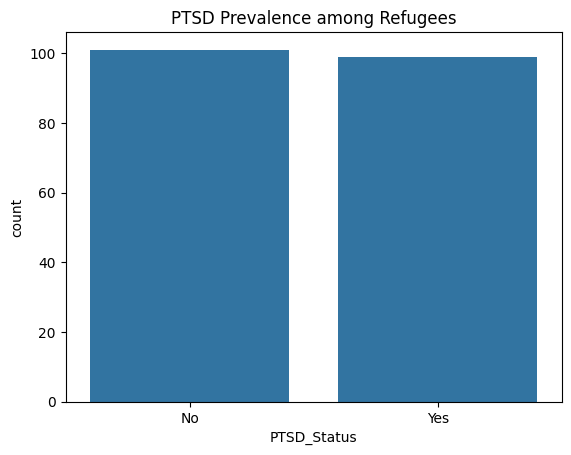

In [ ]:
sns.countplot(x='PTSD_Status', data=data)
plt.title("PTSD Prevalence among Refugees")
plt.show()


# **3.Visualize relationship between PTSD and Drug Use**

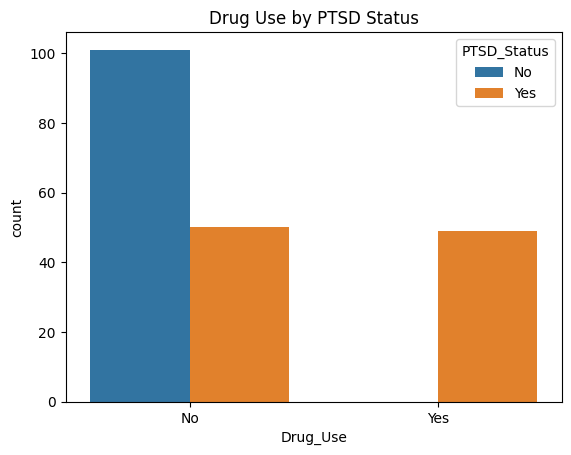

In [ ]:
sns.countplot(x='Drug_Use', hue='PTSD_Status', data=data)
plt.title("Drug Use by PTSD Status")
plt.show()


# 4.Correlation Heatmap (numeric features)

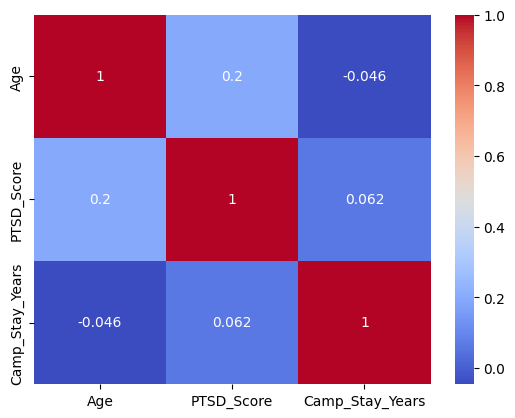

In [ ]:
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

# **d) Statistical Analysis**

**Chi-Square Test for PTSD vs Drug Use**

In [ ]:
contingency_table = pd.crosstab(data['PTSD_Status'], data['Drug_Use'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-square:", chi2)
print("p-value:", p)


Chi-square: 63.563055859579755
p-value: 1.5531482132165227e-15


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Encode categorical variables
data_encoded = pd.get_dummies(data, drop_first=True)

# Adjusted to use existing columns: Financial_Stress_Low and Peer_Influence_Low
X = data_encoded[['Age','PTSD_Score','Financial_Stress_Low','Peer_Influence_Low','Camp_Stay_Years']]
y = data_encoded['Drug_Use_Yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.95      0.98      0.96        42
        True       0.94      0.89      0.91        18

    accuracy                           0.95        60
   macro avg       0.95      0.93      0.94        60
weighted avg       0.95      0.95      0.95        60



# **e) Advanced Analysis (Optional)**

**Logistic Regression**: Predict drug use based on PTSD, financial stress, peer influence, age.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Encode categorical variables
data_encoded = pd.get_dummies(data, drop_first=True)

# Fixed: Using the columns actually present in the encoded dataframe
X = data_encoded[['Age','PTSD_Score','Financial_Stress_Low','Peer_Influence_Low','Camp_Stay_Years']]
y = data_encoded['Drug_Use_Yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.95      0.98      0.96        42
        True       0.94      0.89      0.91        18

    accuracy                           0.95        60
   macro avg       0.95      0.93      0.94        60
weighted avg       0.95      0.95      0.95        60



# **f) Insights & Recommendations**

Visualizations highlight higher drug use among PTSD sufferers with high peer influence.

Age and duration in camp may also affect risk.

Intervention programs could target high-risk groups